# Coleta de dados

## Fontes

In [1]:
### https://anaconda.org/anaconda/py-xgboost
### Importando as libs
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.metrics import confusion_matrix, mean_squared_error
import pylab as pl

In [2]:
### Coletando as fontes de dados
test_csv = pd.read_csv('r_teste.csv', sep = ',', encoding = 'UTF-8',header='infer')
train_csv = pd.read_csv('r_treino.csv', sep = ',', encoding = 'UTF-8',header='infer')
train_dropna_csv = pd.read_csv('r_treino_dropna.csv', sep = ',', encoding = 'UTF-8',header='infer')

In [3]:
from sklearn import model_selection

In [4]:
colunasx=[
    'Classe',
    'ParentesFilhos',
    'SaudacaoNum'    
]
colunasy=['Sobreviventes']

In [5]:
### Config
seed = 7 
teste_size=0.30 ##30%

In [6]:
train_dropna_csv=train_dropna_csv.set_index(train_dropna_csv['PassageiroId'])

In [7]:
#treinox_dropna = pd.DataFrame(train_dropna_csv,columns=colunasx).values
#treinoy_dropna = pd.DataFrame(train_dropna_csv,columns=colunasy).values.flatten()

## Resampling

In [8]:
x_treino_dropna, x_teste_dropna, y_treino_dropna, y_teste_dropna = model_selection.train_test_split(train_dropna_csv[colunasx],train_dropna_csv[colunasy],test_size=teste_size,random_state=seed)

## Treinando o Modelo

In [9]:
xgb_model = xgb.XGBClassifier().fit(x_treino_dropna, y_treino_dropna)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:95: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:128: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Treinando o Modelo - Predict

In [17]:
predictions = xgb_model.predict(x_teste_dropna)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [18]:
actuals = y_teste_dropna
print(confusion_matrix(actuals, predictions))

[[118   8]
 [ 38  51]]


In [19]:
previsto= pd.DataFrame({'previsto':predictions},index=actuals.index)
resultadoErros =       previsto.loc[previsto['previsto'].values != actuals['Sobreviventes'].values]
resultadoAcertos =     previsto.loc[previsto['previsto'].values == actuals['Sobreviventes'].values]

In [20]:
resultXGBClassifier = xgb_model.score(x_teste_dropna,y_teste_dropna)
print('Score XGBClassifier:',(resultXGBClassifier*100.0))

Score XGBClassifier: 78.6046511627907


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [21]:
print('Predict',x_teste_dropna.shape)
print('Erros',resultadoErros.shape)
print('Acertos',resultadoAcertos.shape)

Predict (215, 3)
Erros (46, 1)
Acertos (169, 1)


# Resultado Final

In [25]:
y_pred_dropna = xgb_model.predict(test_csv[colunasx])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [26]:
submission = pd.DataFrame({
        "PassengerId": test_csv["PassageiroId"],
        "Survived": y_pred_dropna
    })
submission.to_csv('resultXGBClassifier_dropna.csv', index=False)

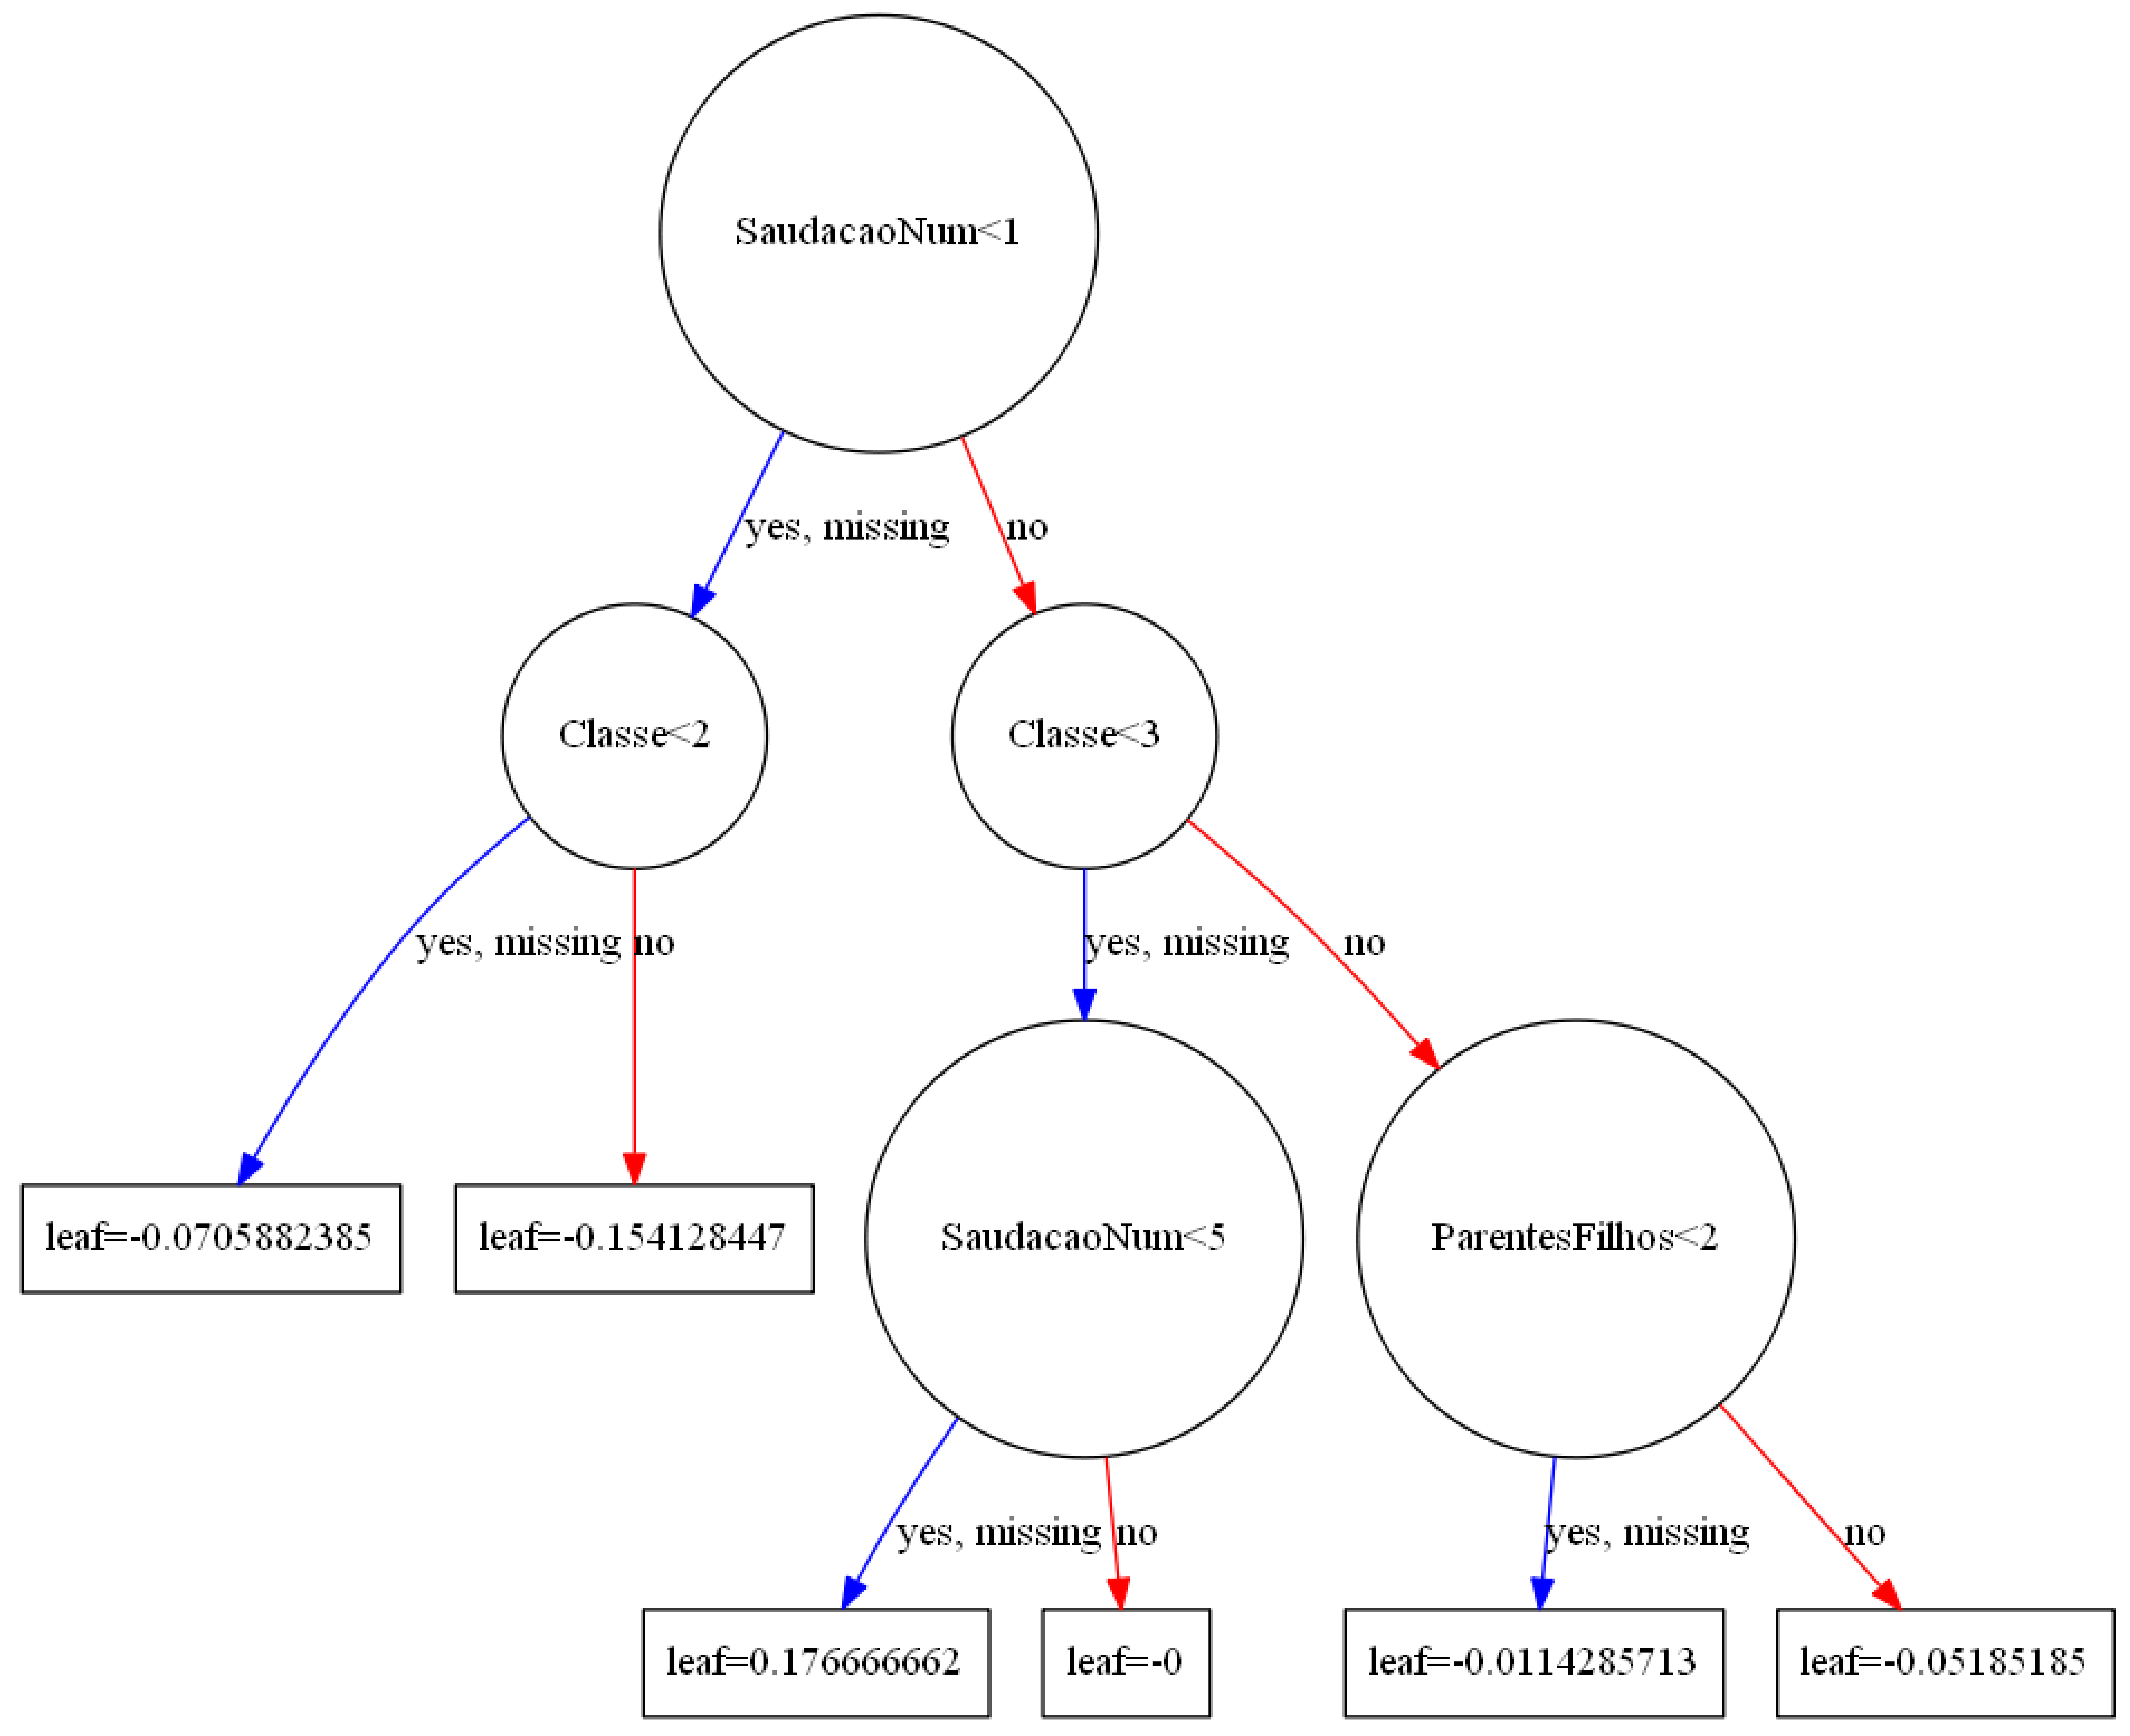

In [27]:
xgb.plot_tree(xgb_model)
fig = pl.gcf()
fig.set_size_inches(150, 100)